In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [58]:
df=pd.read_csv('D:\Projects\MachineLearning\Data\WHO LifeExpectancy\Life Expectancy Data.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Dell\AppData\Local\Temp\ipykernel_62440\4233769500.py:1: SyntaxWarning: invalid escape sequence '\P'
  df=pd.read_csv('D:\Projects\MachineLearning\Data\WHO LifeExpectancy\Life Expectancy Data.csv')


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [60]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [61]:
null_counts = df.isna().sum()

In [62]:
null_counts

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [63]:
# Rename columns by stripping spaces and replacing them with underscores
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Display updated column names
print(df.columns)


Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')


In [64]:
num_cols = ["Adult_Mortality", "Alcohol", "Hepatitis_B", "Polio", "Diphtheria",
            "Total_expenditure", "GDP", "Population", "thinness_5-9_years", 
            "thinness__1-19_years", "Income_composition_of_resources", "Schooling"]

# Fill missing values with the median of each country
for col in num_cols:
    df[col] = df.groupby("Country")[col].transform(lambda x: x.fillna(x.median()))

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  ret

In [65]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Display final null values to verify
print(df.isnull().sum())

Country                             0
Year                                0
Status                              0
Life_expectancy                    10
Adult_Mortality                     0
infant_deaths                       0
Alcohol                             0
percentage_expenditure              0
Hepatitis_B                         0
Measles                             0
BMI                                34
under-five_deaths                   0
Polio                               0
Total_expenditure                   0
Diphtheria                          0
HIV/AIDS                            0
GDP                                 0
Population                          0
thinness__1-19_years                0
thinness_5-9_years                  0
Income_composition_of_resources     0
Schooling                           0
dtype: int64


In [66]:
df = df.dropna(subset=["BMI"])
df = df.dropna(subset=["Life_expectancy"])
print(df.isnull().sum())

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under-five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness__1-19_years               0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64


In [67]:
print(df.info())
print(df['Status'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 2896 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2896 non-null   object 
 1   Year                             2896 non-null   int64  
 2   Status                           2896 non-null   object 
 3   Life_expectancy                  2896 non-null   float64
 4   Adult_Mortality                  2896 non-null   float64
 5   infant_deaths                    2896 non-null   int64  
 6   Alcohol                          2896 non-null   float64
 7   percentage_expenditure           2896 non-null   float64
 8   Hepatitis_B                      2896 non-null   float64
 9   Measles                          2896 non-null   int64  
 10  BMI                              2896 non-null   float64
 11  under-five_deaths                2896 non-null   int64  
 12  Polio                    

In [68]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to 'Country' column
df['Country_encoded'] = label_encoder.fit_transform(df['Country'])

# Display the first few rows to check the encoding
print(df[['Country', 'Country_encoded']].head())
df["Status"] = df["Status"].map({"Developing": 0, "Developed": 1})
Country = df.pop("Country")  # Remove and store the column

       Country  Country_encoded
0  Afghanistan                0
1  Afghanistan                0
2  Afghanistan                0
3  Afghanistan                0
4  Afghanistan                0


In [69]:
df.head()

,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,...,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,Country_encoded
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0


In [1]:
df.pop('infant_deaths')
df.pop('thinness_5-9_years')
df.pop('thinness__1-19_years')

NameError: name 'df' is not defined

In [77]:
df.pop('percentage_expenditure')

0       71.279624
1       73.523582
2       73.219243
3       78.184215
4        7.097109
          ...    
2933     0.000000
2934     0.000000
2935     0.000000
2936     0.000000
2937     0.000000
Name: percentage_expenditure, Length: 2896, dtype: float64

Correlation Matrix:
                                          Year        Status  Life_expectancy  \
Year                             1.000000e+00  5.091838e-15         0.170500   
Status                           5.091838e-15  1.000000e+00         0.481059   
Life_expectancy                  1.705002e-01  4.810586e-01         1.000000   
Adult_Mortality                 -8.038855e-02 -3.131187e-01        -0.693411   
Alcohol                         -3.970883e-02  5.978818e-01         0.405092   
Hepatitis_B                      1.014505e-01  1.414486e-01         0.290130   
Measles                         -8.231555e-02 -7.774985e-02        -0.160447   
BMI                              1.046676e-01  3.150921e-01         0.567694   
under-five_deaths               -4.185328e-02 -1.149544e-01        -0.223072   
Polio                            9.572924e-02  2.198042e-01         0.464561   
Total_expenditure                7.425943e-02  3.064706e-01         0.218307   
Diphtheria         

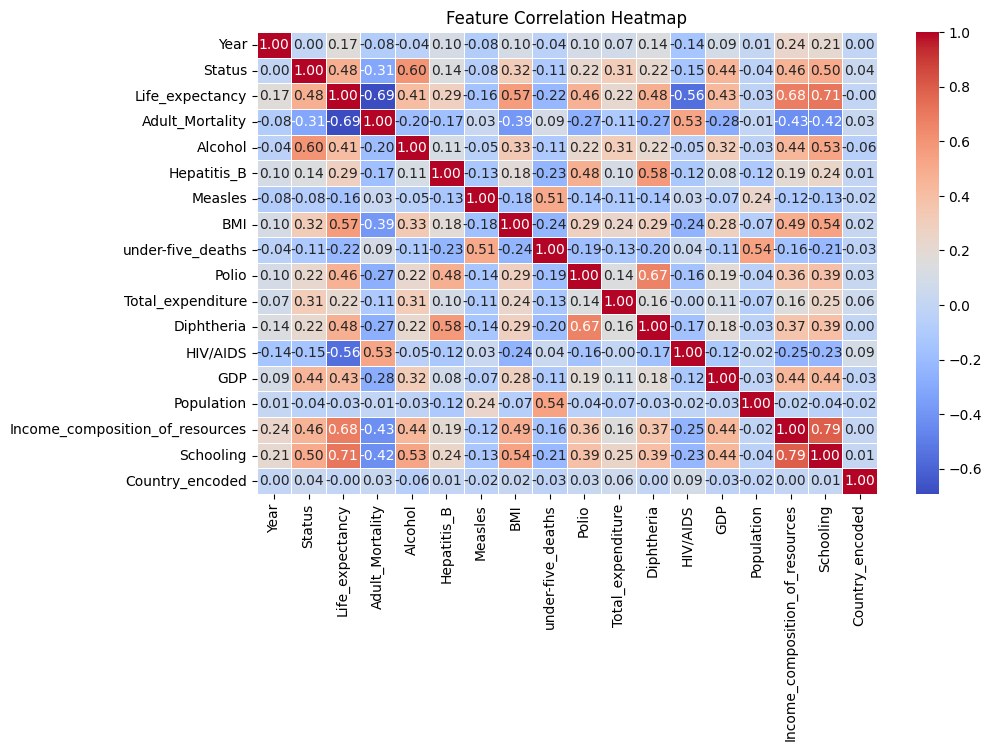

In [78]:
correlation_matrix = df.corr()

# Print correlation values
print("Correlation Matrix:\n", correlation_matrix)

# Visualize with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Top Correlated Features with Life Expectancy:
Life_expectancy                    1.000000
Schooling                          0.714695
Income_composition_of_resources    0.682763
BMI                                0.567694
Status                             0.481059
Diphtheria                         0.478566
Polio                              0.464561
GDP                                0.430922
Alcohol                            0.405092
percentage_expenditure             0.380944
Hepatitis_B                        0.290130
Total_expenditure                  0.218307
Year                               0.170500
Country_encoded                   -0.002860
Population                        -0.029601
Measles                           -0.160447
infant_deaths                     -0.197326
under-five_deaths                 -0.223072
thinness_5-9_years                -0.471584
thinness__1-19_years              -0.477183
HIV/AIDS                          -0.560010
Adult_Mortality               

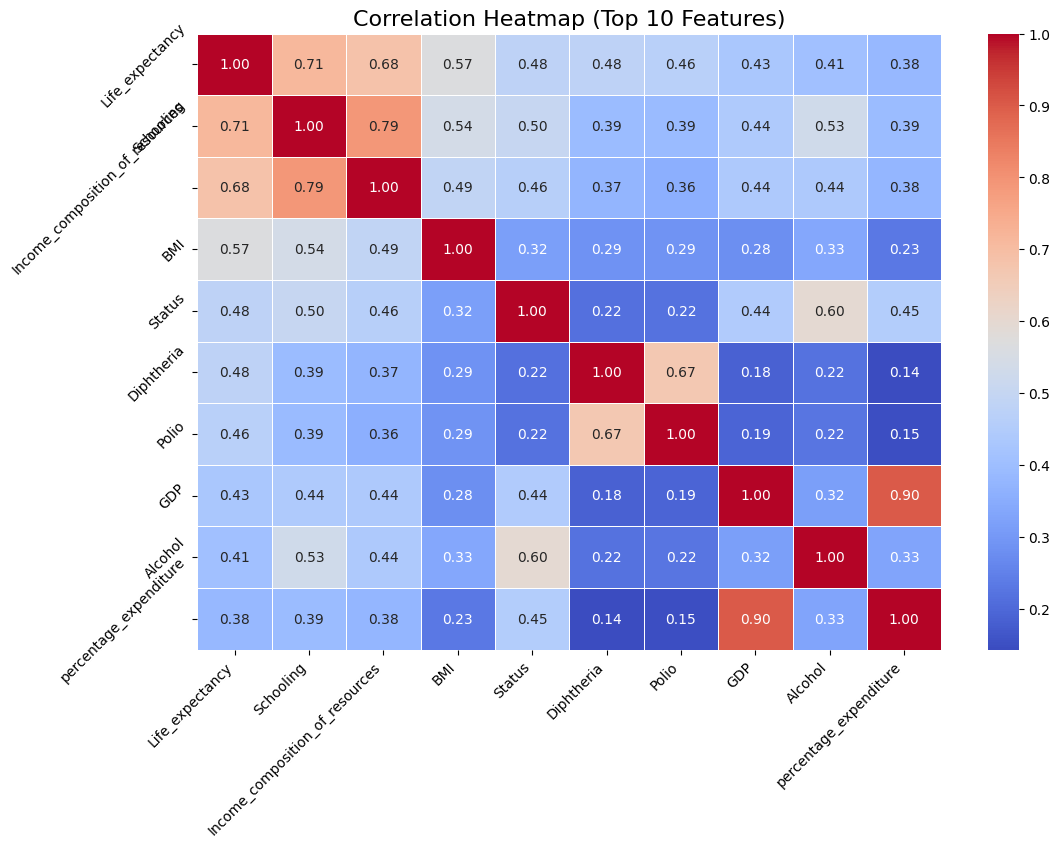

In [71]:
'''
correlation_matrix = df.corr()

# Focus on the correlation of features with 'Life expectancy'
life_expectancy_corr = correlation_matrix["Life_expectancy"].sort_values(ascending=False)

# Display top correlated features
print("Top Correlated Features with Life Expectancy:")
print(life_expectancy_corr)

# Select the top 10 correlated features
top_features = life_expectancy_corr.index[:10]

# Plot heatmap for top 10 correlated features
plt.figure(figsize=(12, 8))  # Increase figure size
sns.heatmap(df[top_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Top 10 Features)", fontsize=16)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels
plt.yticks(rotation=45, ha="right")  # Rotate y-axis labels
plt.show()
'''

In [80]:
energy = df.pop("Life_expectancy")
df["Life_Expectancy"] = energy 

In [81]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
    from sklearn.linear_model import LinearRegression
    regressor=LinearRegression()
    regressor.fit(x_train,y_train)

LinearRegression()

In [86]:
test_predict=regressor.predict(x_test)
train_predict=regressor.predict(x_train)
print(test_predict)
print(train_predict)

[79.10644414 78.71759499 73.35433247 78.9294723  76.80554437 66.56143261
 73.22476372 72.96855496 55.59160831 64.02937137 60.6675596  76.14228831
 70.72854075 70.93767267 70.74888945 74.58803644 62.37521187 77.81512444
 70.29479575 70.18236099 60.33804081 71.43317276 75.94178263 51.91990981
 64.02220124 74.94190383 75.94381027 68.4320313  83.66419641 71.36150093
 67.96763722 76.2554614  64.62979317 84.39363747 54.42127328 50.75152208
 81.24904752 77.04638503 79.77926407 78.37197818 75.44812646 78.34106019
 74.77691927 53.67776824 73.696074   49.25144431 58.55718291 52.65951576
 67.87157904 71.45846737 78.44376786 51.37279163 65.54595308 66.96904244
 54.84951182 80.62900388 62.60228747 61.88718445 74.56761461 70.38416626
 60.83453035 82.19661628 78.91738952 71.04254404 76.58209816 34.47040161
 75.60222251 74.74213933 69.30304427 76.21702533 67.6229199  69.82039176
 68.71165217 59.16524419 78.71499343 80.99926284 57.25308204 79.75136659
 54.85789785 83.75459708 77.22987208 63.93902223 74

In [87]:
mse_train = mean_squared_error(y_train, train_predict)
mse_test = mean_squared_error(y_test, test_predict)

# Calculate RMSE (more interpretable)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate R² score (goodness of fit)
r2_train = r2_score(y_train, train_predict)
r2_test = r2_score(y_test, test_predict)

# Print results
print("Training Set Performance:")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"R² Score: {r2_train:.4f}")

print("\nTest Set Performance:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"R² Score: {r2_test:.4f}")

Training Set Performance:
Mean Squared Error (MSE): 17.1511
Root Mean Squared Error (RMSE): 4.1414
R² Score: 0.8087

Test Set Performance:
Mean Squared Error (MSE): 17.8246
Root Mean Squared Error (RMSE): 4.2219
R² Score: 0.8049


C:\Users\Dell\AppData\Local\Temp\ipykernel_62440\4183743648.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


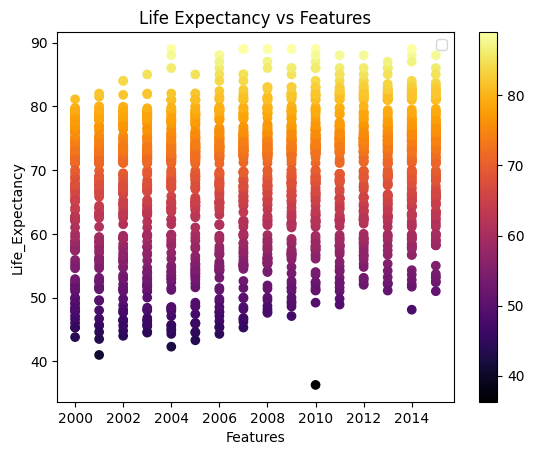

: 

In [ ]:
x_feature = x_train[:, 0]  # 1D array, shape (800,)

# Sort for a smooth prediction line
sort_idx = np.argsort(x_feature)
x_sorted = x_feature[sort_idx]
pred_sorted = train_predict[sort_idx]

# Scatter actual data, color by y_train
plt.scatter(x_feature, y_train, c=y_train, cmap="inferno")
# Plot regression line


plt.title("Life Expectancy vs Features")
plt.xlabel("Features")  # Update this label based on your feature
plt.ylabel("Life_Expectancy")
plt.colorbar()
plt.legend()
plt.show()